Statistical values and shape of the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.4555

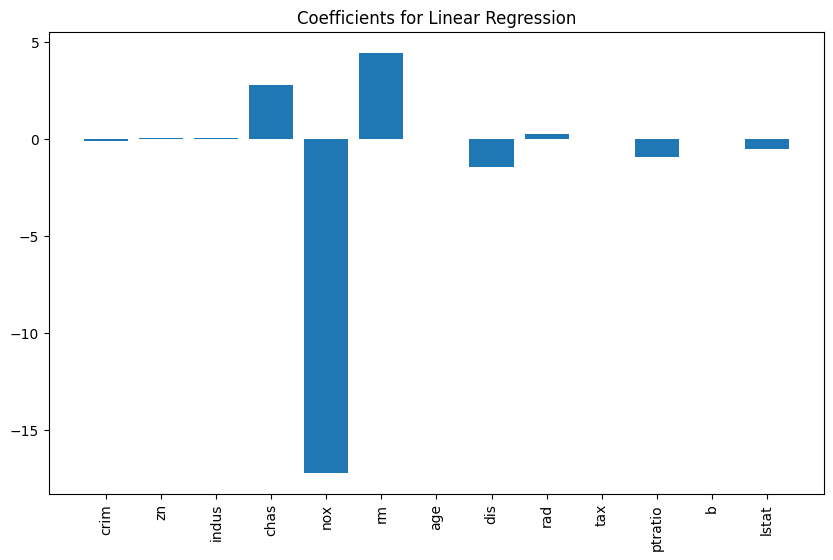

Mean Square Error (MSE) for Ridge Regression: 24.477191227708644
Coefficients for Ridge Regression:
[-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Mean Square Error (MSE) for Lasso Regression: 24.409489761299707
Coefficients for Lasso Regression:
[-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]
Mean Square Error (MSE) for Elastic Net Regression: 23.96873321020479
Coefficients for Elastic Net Regression:
[-0.09329918  0.03557051 -0.02012984  0.         -0.          1.16299643
  0.01859135 -0.7554234   0.27598038 -0.01427315 -0.7527046   0.01101275
 -0.77557569]


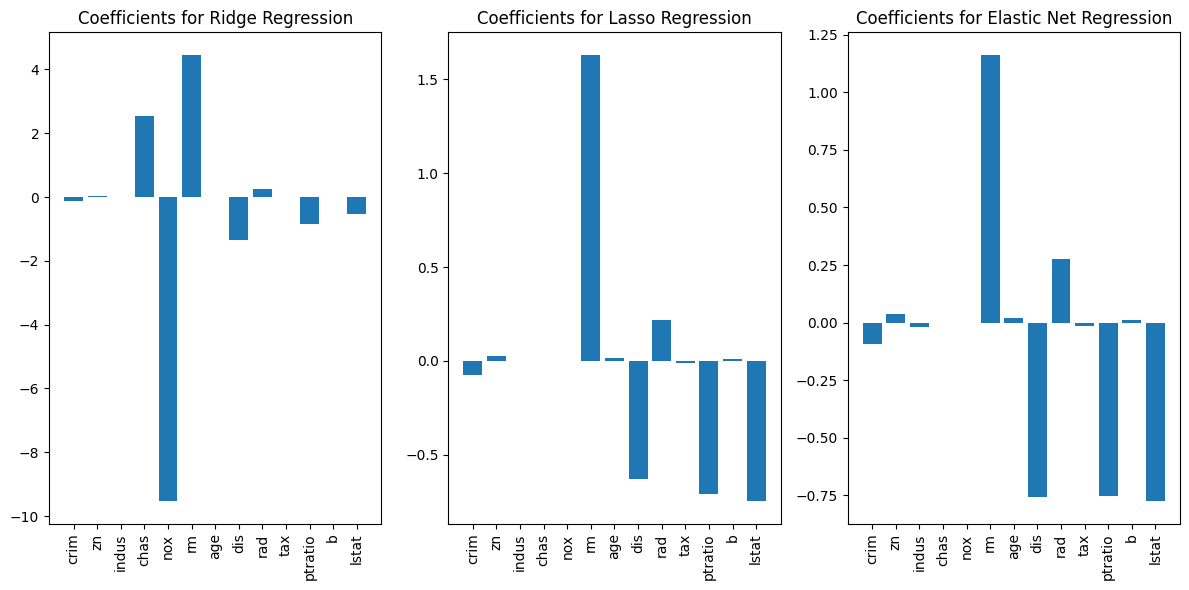

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step a: Read the dataset and print statistical values and shape
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)
print("Statistical values and shape of the dataset:")
print(data.describe())
print("Shape of the dataset:", data.shape)

# Step b: Separate the features into X and Y
X = data.drop("medv", axis=1)  # Features
Y = data["medv"]  # Target variable

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Step c: Split the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Step d: Implement Linear Regression and print MSE
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, Y_pred)
print("Mean Square Error (MSE) for Linear Regression:", mse_lr)

# Step e: Print the coefficients of input features
print("Coefficients for Linear Regression:")
coef_lr = lr.coef_
print(coef_lr)

# Step f: Plot a bar chart of coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coef_lr)
plt.title("Coefficients for Linear Regression")
plt.xticks(rotation=90)
plt.show()

# Step g: Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("Mean Square Error (MSE) for Ridge Regression:", mse_ridge)
print("Coefficients for Ridge Regression:")
coef_ridge = ridge.coef_
print(coef_ridge)

# Step h: Implement Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("Mean Square Error (MSE) for Lasso Regression:", mse_lasso)
print("Coefficients for Lasso Regression:")
coef_lasso = lasso.coef_
print(coef_lasso)

# Step i: Implement Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, Y_train)
Y_pred_en = elastic_net.predict(X_test)
mse_en = mean_squared_error(Y_test, Y_pred_en)
print("Mean Square Error (MSE) for Elastic Net Regression:", mse_en)
print("Coefficients for Elastic Net Regression:")
coef_en = elastic_net.coef_
print(coef_en)

# Plot bar charts for coefficients of Ridge, Lasso, and Elastic Net
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(X.columns, coef_ridge)
plt.title("Coefficients for Ridge Regression")
plt.xticks(rotation=90)
plt.subplot(132)
plt.bar(X.columns, coef_lasso)
plt.title("Coefficients for Lasso Regression")
plt.xticks(rotation=90)
plt.subplot(133)
plt.bar(X.columns, coef_en)
plt.title("Coefficients for Elastic Net Regression")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
